# Homework Answer

Import Libs

In [ ]:
import cv2
from matplotlib import pyplot as plt    
from pylab import imread

Getting image

Image size: (1057, 1920, 4)
Image data type: float32


(np.float64(-0.5), np.float64(1919.5), np.float64(1056.5), np.float64(-0.5))

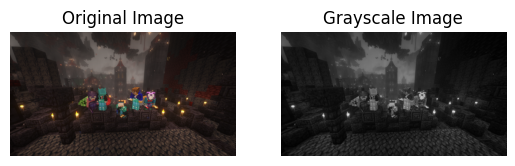

In [ ]:
newImg = imread('minecraft.png')
# print image size (y,x, idk what is this)
print("Image size:", newImg.shape)
# print image data type 
print("Image data type:", newImg.dtype)

# convert to gray
newImg_grayified = cv2.cvtColor(newImg, cv2.COLOR_BGR2GRAY)

# print images
plt.subplot(1, 2, 1)
plt.imshow(newImg)
plt.title("OG Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(newImg_grayified, cmap='gray')
plt.title("Grayified Image")
plt.axis("off")


Function to check if image